# **1. Perkenalan Dataset**


Dataset yang digunakan adalah dataset "Bank Transaction Dataset for Fraud Detection" dari kaggle https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection

Dengan tujuan mengklasifikasi transaksi-transaksi apakah termasuk transaksi biasa atau penipuan.

File tersebut sudah didownload dan dipindahkan ke github untuk nantinya di load pada project ini melalui raw github https://raw.githubusercontent.com/mraihanfauzii/Fraud-Detection-Classification-on-Bank-Transaction-Dataset/refs/heads/main/bank_transactions_data.csv

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import datetime

# **3. Memuat Dataset**

In [2]:
transactions_df = pd.read_csv("https://raw.githubusercontent.com/mraihanfauzii/Fraud-Detection-Classification-on-Bank-Transaction-Dataset/refs/heads/main/bank_transactions_data.csv")
transactions_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, dilakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Menangani data yang hilang dengan pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
print("Data Loaded. Shape:", transactions_df.shape)

Data Loaded. Shape: (2512, 16)


In [4]:
print("\n--- Info Data ---")
transactions_df.info()


--- Info Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Accou

In [5]:
print("\n--- Cek Missing Value ---")
transactions_df.isna().sum()


--- Cek Missing Value ---


,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [6]:
print("Jumlah duplikasi: ", transactions_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
print("\n--- Statistik Deskriptif ---")
transactions_df.describe(include='all')


--- Statistik Deskriptif ---


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX000001,AC00362,NaN,2023-04-11 16:29:14,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


In [8]:
transactions_df["Location"].unique()

array(['San Diego', 'Houston', 'Mesa', 'Raleigh', 'Atlanta',
       'Oklahoma City', 'Seattle', 'Indianapolis', 'Detroit', 'Nashville',
       'Albuquerque', 'Memphis', 'Louisville', 'Denver', 'Austin',
       'Columbus', 'Los Angeles', 'Las Vegas', 'Fort Worth', 'Miami',
       'Milwaukee', 'Baltimore', 'New York', 'San Francisco', 'San Jose',
       'San Antonio', 'Philadelphia', 'Charlotte', 'Tucson', 'Chicago',
       'Sacramento', 'Kansas City', 'Omaha', 'Virginia Beach', 'Dallas',
       'Boston', 'Jacksonville', 'Phoenix', 'Washington', 'El Paso',
       'Colorado Springs', 'Fresno', 'Portland'], dtype=object)

In [9]:
transactions_df["Location"].value_counts()

,count
Location,
Fort Worth,70
Los Angeles,69
Oklahoma City,68
Charlotte,68
Tucson,67
Philadelphia,67
Omaha,65
Miami,64
Detroit,63


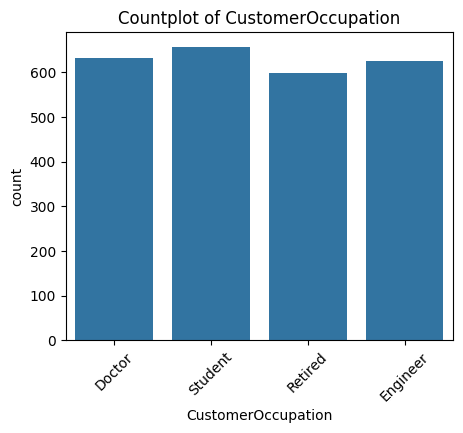

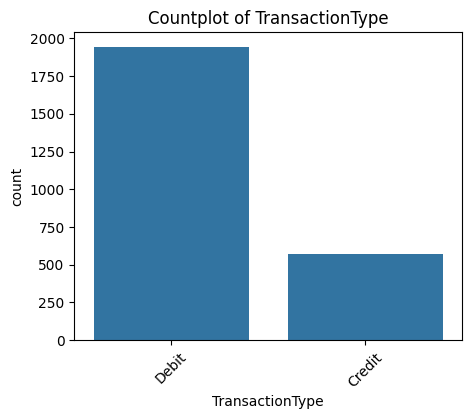

In [10]:
cat_features = ['CustomerOccupation','TransactionType']

for col in cat_features:
    if col in transactions_df.columns:
        plt.figure(figsize=(5,4))
        sns.countplot(x=col, data=transactions_df)
        plt.title(f"Countplot of {col}")
        plt.xticks(rotation=45)
        plt.show()

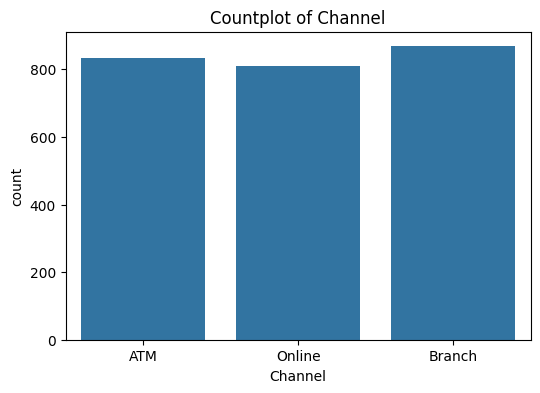

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=transactions_df, x='Channel')
plt.title("Countplot of Channel")
plt.show()

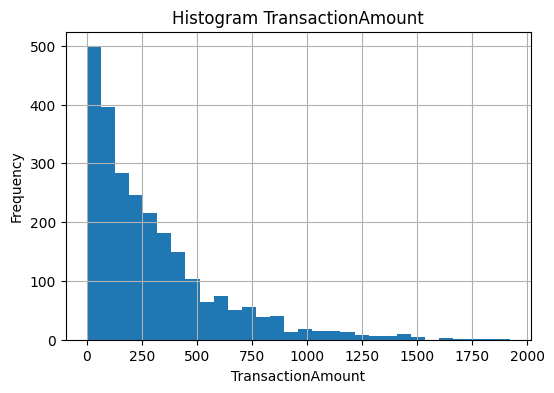

In [12]:
plt.figure(figsize=(6,4))
transactions_df['TransactionAmount'].hist(bins=30)
plt.title('Histogram TransactionAmount')
plt.xlabel('TransactionAmount')
plt.ylabel('Frequency')
plt.show()

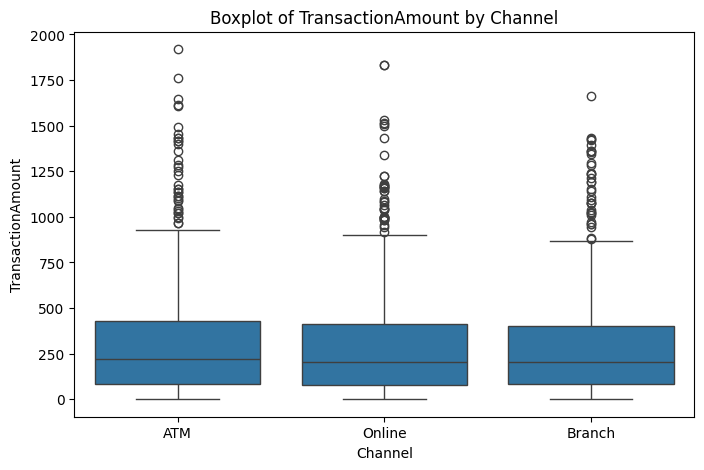

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(data=transactions_df, x='Channel', y='TransactionAmount')
plt.title("Boxplot of TransactionAmount by Channel")
plt.show()

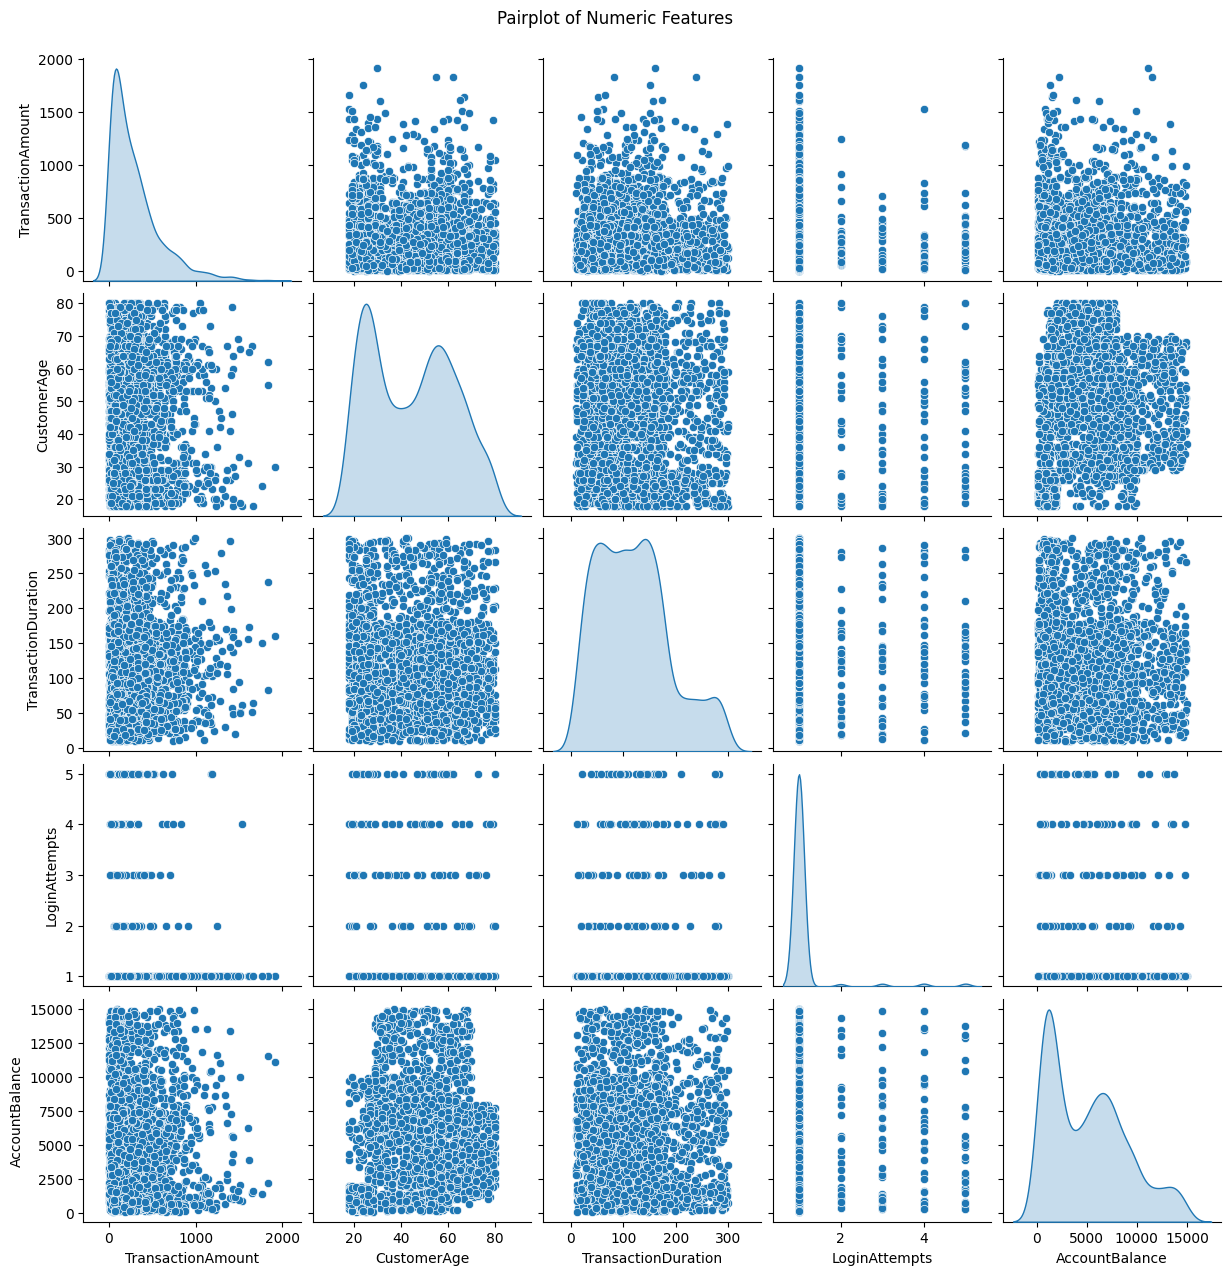

In [14]:
num_features = ['TransactionAmount','CustomerAge','TransactionDuration',
                'LoginAttempts','AccountBalance']
sns.pairplot(transactions_df[num_features], diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

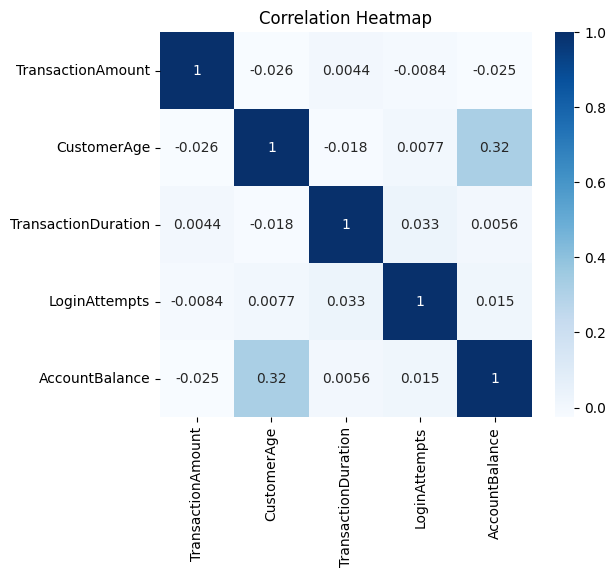

In [15]:
plt.figure(figsize=(6,5))
corr = transactions_df[num_features].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

# **5. Data Preprocessing**

In [16]:
transactions_df['TransactionAmount_log'] = np.log1p(transactions_df['TransactionAmount'])
transactions_df['AmountBalanceRatio'] = transactions_df['TransactionAmount_log'] / (transactions_df['AccountBalance'] + 1e-9)

In [17]:
selected_features = [
    'TransactionAmount_log',
    'TransactionType',
    'Channel',
    'LoginAttempts',
    'AccountBalance',
    'AmountBalanceRatio'
]

df_selected = transactions_df[selected_features].copy()
df_selected.drop_duplicates(inplace=True)
print("Selected shape:", df_selected.shape)
df_selected.head()

Selected shape: (2512, 6)


,TransactionAmount_log,TransactionType,Channel,LoginAttempts,AccountBalance,AmountBalanceRatio
0,2.714032,Debit,ATM,1,5112.21,0.000531
1,5.932882,Debit,ATM,1,13758.91,0.000431
2,4.846468,Debit,Online,1,1122.35,0.004318
3,5.223055,Debit,Online,1,8569.06,0.000610
4,2.670694,Credit,Online,1,7429.40,0.000359


In [18]:
encoders = {}
num_cols = ['TransactionAmount_log','AccountBalance','LoginAttempts','AmountBalanceRatio']
cat_cols = ['Channel','TransactionType',]

for col in cat_cols:
    le = LabelEncoder()
    df_selected[col] = le.fit_transform(df_selected[col])
    encoders[col] = le

In [19]:
scaler = StandardScaler()
df_scaled = df_selected.copy()
df_scaled[num_cols] = scaler.fit_transform(df_selected[num_cols])

X = df_scaled.values

print("\n--- Head df_scaled ---")
df_scaled.head()


--- Head df_scaled ---


,TransactionAmount_log,TransactionType,Channel,LoginAttempts,AccountBalance,AmountBalanceRatio
0,-1.994061,1,0,-0.206794,-0.000537,-0.459222
1,0.646895,1,0,-0.206794,2.216472,-0.475586
2,-0.244470,1,2,-0.206794,-1.023534,0.162452
3,0.064507,1,2,-0.206794,0.885797,-0.446315
4,-2.029619,0,2,-0.206794,0.593589,-0.487360


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, akan dibangun model clustering dengan algoritma K-Means, DBScan, dan Agglomerative untuk dibandingkan hasilnya dan akan digunakan hasil terbaik.

In [20]:
#K-Means
kmeans_sil_list = []
def kmeans(X_data, k_range=range(2,11)):
    inertia_list = []
    for k in k_range:
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(X_data)
        labels_km = km.labels_
        inertia_list.append(km.inertia_)
        kmeans_sil_list.append(silhouette_score(X_data, labels_km))
    return inertia_list, kmeans_sil_list

In [21]:
#DBScan
dbscan_sil_list = []
dbscan_num_clusters = []
def dbscan(X_data, eps_list=[0.5,1.0,1.5,2.0]):
    for eps_val in eps_list:
        db = DBSCAN(eps=eps_val, min_samples=5)
        labels_db = db.fit_predict(X_data)
        cluster_labels = set(labels_db)
        if -1 in cluster_labels:
            cluster_labels.remove(-1)
        n_clusters = len(cluster_labels)
        dbscan_num_clusters.append(n_clusters)

        if len(set(labels_db))<2:
            dbscan_sil_list.append(-1)
        else:
            dbscan_sil_list.append(silhouette_score(X_data, labels_db))
    return dbscan_num_clusters, dbscan_sil_list

In [22]:
#Agglomerative
agg_sil_scores = []
def agglomerative(X_data, k_range=range(2,11)):
    for k in k_range:
        agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
        labels_agg = agg.fit_predict(X_data)
        agg_sil_scores.append(silhouette_score(X_data, labels_agg))
    return agg_sil_scores

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, akan digunakan metode Elbow dan Silhouette Score. Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif.

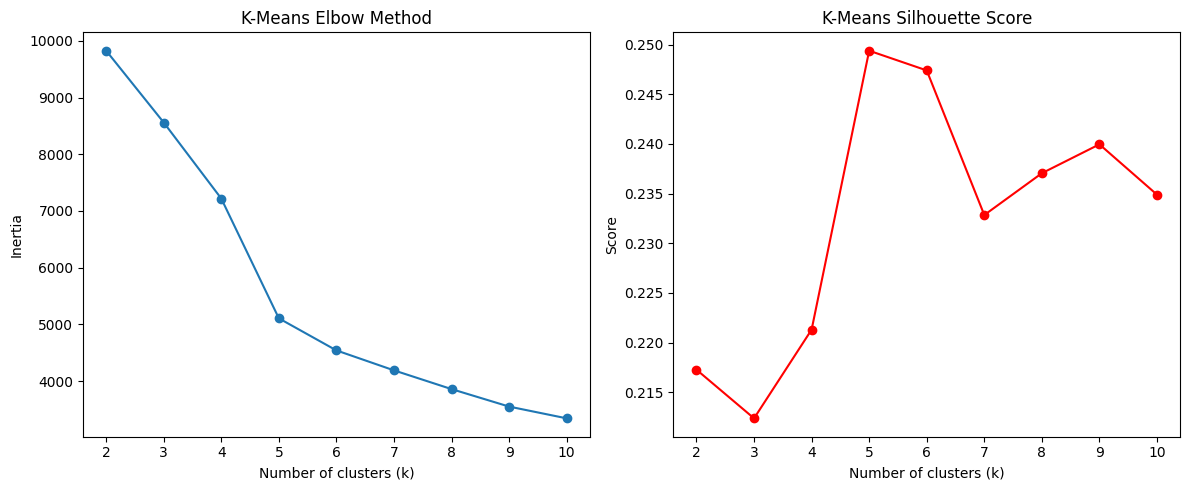


=== K-Means Silhouette (Baseline) ===
k=2, Silhouette=0.2173
k=3, Silhouette=0.2124
k=4, Silhouette=0.2213
k=5, Silhouette=0.2494
k=6, Silhouette=0.2474
k=7, Silhouette=0.2328
k=8, Silhouette=0.2371
k=9, Silhouette=0.2400
k=10, Silhouette=0.2349


In [23]:
### K-Means baseline
K_range = range(2, 11)
inertia_base, sil_km_base = kmeans(X, K_range)

plt.figure(figsize=(12,5))

# Elbow (Inertia) vs k
plt.subplot(1,2,1)
plt.plot(K_range, inertia_base, marker='o')
plt.title("K-Means Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")

# Silhouette vs k
plt.subplot(1,2,2)
plt.plot(K_range, sil_km_base, marker='o', color='red')
plt.title("K-Means Silhouette Score")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

print("\n=== K-Means Silhouette (Baseline) ===")
for k, sil_val in zip(K_range, sil_km_base):
    print(f"k={k}, Silhouette={sil_val:.4f}")

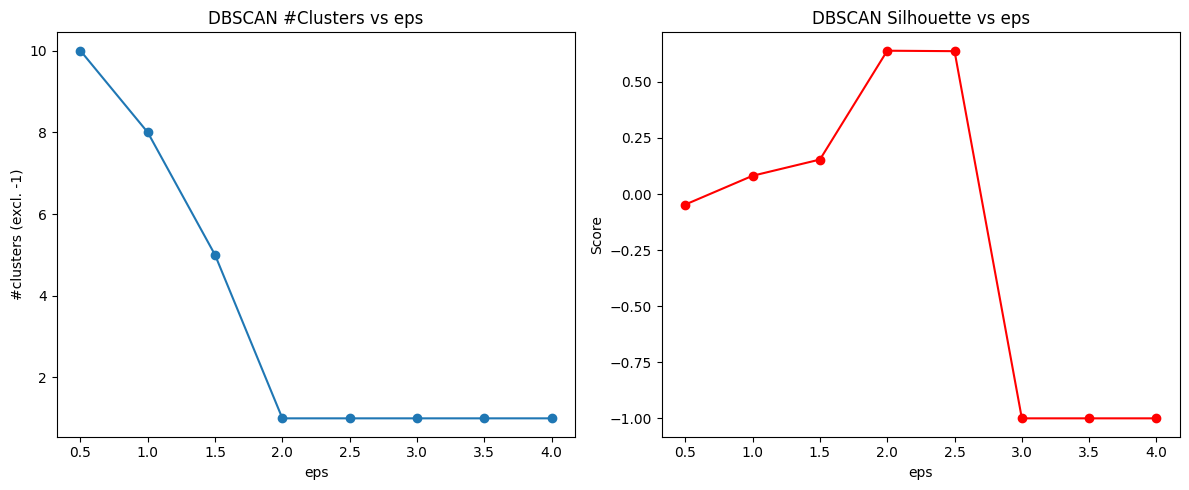


=== DBSCAN Silhouette (Baseline) ===
eps=0.5, #clusters=10, Silhouette=-0.0467
eps=1.0, #clusters=8, Silhouette=0.0817
eps=1.5, #clusters=5, Silhouette=0.1540
eps=2.0, #clusters=1, Silhouette=0.6392
eps=2.5, #clusters=1, Silhouette=0.6372
eps=3.0, #clusters=1, Silhouette=-1.0000
eps=3.5, #clusters=1, Silhouette=-1.0000
eps=4.0, #clusters=1, Silhouette=-1.0000


In [24]:
### DBSCAN baseline
eps_list = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]
db_num_base, db_sil_base = dbscan(X, eps_list)

plt.figure(figsize=(12,5))

# "Elbow" = #clusters vs eps
plt.subplot(1,2,1)
plt.plot(eps_list, db_num_base, marker='o')
plt.title("DBSCAN #Clusters vs eps")
plt.xlabel("eps")
plt.ylabel("#clusters (excl. -1)")

# Silhouette vs eps
plt.subplot(1,2,2)
plt.plot(eps_list, db_sil_base, marker='o', color='red')
plt.title("DBSCAN Silhouette vs eps")
plt.xlabel("eps")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

print("\n=== DBSCAN Silhouette (Baseline) ===")
for eps_val, n_cl, sil_val in zip(eps_list, db_num_base, db_sil_base):
    print(f"eps={eps_val}, #clusters={n_cl}, Silhouette={sil_val:.4f}")

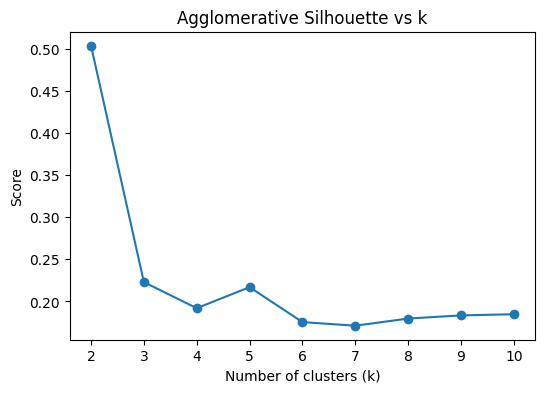


=== Agglomerative Silhouette (Baseline) ===
k=2, Silhouette=0.5036
k=3, Silhouette=0.2230
k=4, Silhouette=0.1920
k=5, Silhouette=0.2169
k=6, Silhouette=0.1755
k=7, Silhouette=0.1711
k=8, Silhouette=0.1797
k=9, Silhouette=0.1834
k=10, Silhouette=0.1848


In [25]:
### Agglomerative baseline
agg_sil_base = agglomerative(X, K_range)

plt.figure(figsize=(6,4))
plt.plot(K_range, agg_sil_base, marker='o')
plt.title("Agglomerative Silhouette vs k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Score")
plt.show()

print("\n=== Agglomerative Silhouette (Baseline) ===")
for k, sil_val in zip(K_range, agg_sil_base):
    print(f"k={k}, Silhouette={sil_val:.4f}")

Hasil dari model yang dilatih pada tahap ini tidak akan langsung kita gunakan, karena akan kita sempurnakan dulu model kita dengan feature selection kemudian kita hitung silhouettenya lagi kemudian kita bandingkan, k dengan nilai silhouette tertinggi setelah menerapkan feature selection lah yang akan kita pilih.

## **c. Feature Selection**

Selanjutnya akan dilakukan feature selection untuk optimasi model clustering, kemudian akan di bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection. Disini saya menggunakan 2 tahap yaitu dengan membandingkan keseluruhannya sebelum dan setelah menggunakan PCA pada 3 model tersebut untuk mengetahui dampak silhouette score dengan melakukan feature selection menggunakan pca dan membandingkannya dengan grid search pada 3 model tersebut untuk mencari pengaturan terbaik.

In [26]:
#K-Means
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

inertia_list_pca = []
kmeans_sil_list_pca = []

for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(X_pca)
    labels_pca = kmeans_pca.labels_
    inertia_list_pca.append(kmeans_pca.inertia_)
    kmeans_sil_list_pca.append(silhouette_score(X_pca, labels_pca))

print("\n=== Perbandingan Sebelum PCA (Tanpa Feature Selection) ===")
for k, sil in zip(K_range, kmeans_sil_list):
    print(f"k={k}, Silhouette Score={sil:.4f}")

print("\n=== Setelah PCA (Feature Selection) ===")
for k, sil in zip(K_range, kmeans_sil_list_pca):
    print(f"k={k}, Silhouette Score={sil:.4f}")


=== Perbandingan Sebelum PCA (Tanpa Feature Selection) ===
k=2, Silhouette Score=0.2173
k=3, Silhouette Score=0.2124
k=4, Silhouette Score=0.2213
k=5, Silhouette Score=0.2494
k=6, Silhouette Score=0.2474
k=7, Silhouette Score=0.2328
k=8, Silhouette Score=0.2371
k=9, Silhouette Score=0.2400
k=10, Silhouette Score=0.2349

=== Setelah PCA (Feature Selection) ===
k=2, Silhouette Score=0.4842
k=3, Silhouette Score=0.4629
k=4, Silhouette Score=0.5513
k=5, Silhouette Score=0.5136
k=6, Silhouette Score=0.5172
k=7, Silhouette Score=0.5274
k=8, Silhouette Score=0.5037
k=9, Silhouette Score=0.4977
k=10, Silhouette Score=0.4917


In [27]:
#DBScan
eps_list2 = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]
dbscan_num_clusters_pca = []
dbscan_sil_scores_pca = []

for eps_val in eps_list2:
    db_temp_pca = DBSCAN(eps=eps_val, min_samples=5)
    labels_db_pca = db_temp_pca.fit_predict(X_pca)

    cluster_labels_pca = set(labels_db_pca)
    if -1 in cluster_labels_pca:
        cluster_labels_pca.remove(-1)
    n_clusters_pca = len(cluster_labels_pca)
    dbscan_num_clusters_pca.append(n_clusters_pca)

    if len(set(labels_db_pca))<2:
        sil_db_pca = -1
    else:
        sil_db_pca = silhouette_score(X_pca, labels_db_pca)
    dbscan_sil_scores_pca.append(sil_db_pca)

print("\n=== DBSCAN: Perbandingan Sebelum PCA & Setelah PCA(2) ===")

print("Sebelum PCA (No Feature Selection):")
for eps_val, sil_val in zip(eps_list, dbscan_sil_list):
    idx = eps_list.index(eps_val)
    print(f"eps={eps_val}, #clusters={dbscan_num_clusters[idx]}, Silhouette={sil_val:.4f}")

print("\nSetelah PCA(2):")
for eps_val, sil_val in zip(eps_list2, dbscan_sil_scores_pca):
    idx2 = eps_list2.index(eps_val)
    print(f"eps={eps_val}, #clusters={dbscan_num_clusters_pca[idx2]}, Silhouette={sil_val:.4f}")


=== DBSCAN: Perbandingan Sebelum PCA & Setelah PCA(2) ===
Sebelum PCA (No Feature Selection):
eps=0.5, #clusters=10, Silhouette=-0.0467
eps=1.0, #clusters=8, Silhouette=0.0817
eps=1.5, #clusters=5, Silhouette=0.1540
eps=2.0, #clusters=1, Silhouette=0.6392
eps=2.5, #clusters=1, Silhouette=0.6372
eps=3.0, #clusters=1, Silhouette=-1.0000
eps=3.5, #clusters=1, Silhouette=-1.0000
eps=4.0, #clusters=1, Silhouette=-1.0000

Setelah PCA(2):
eps=0.5, #clusters=6, Silhouette=0.4218
eps=1.0, #clusters=5, Silhouette=0.4155
eps=1.5, #clusters=4, Silhouette=0.6314
eps=2.0, #clusters=1, Silhouette=-1.0000
eps=2.5, #clusters=1, Silhouette=-1.0000
eps=3.0, #clusters=1, Silhouette=-1.0000
eps=3.5, #clusters=1, Silhouette=-1.0000
eps=4.0, #clusters=1, Silhouette=-1.0000


In [28]:
#Agglomerative
agg_sil_pca = []
for k in K_range:
    agg_temp_pca = AgglomerativeClustering(n_clusters=k, linkage='average')
    labels_agg_pca = agg_temp_pca.fit_predict(X_pca)
    sil_agg_pca = silhouette_score(X_pca, labels_agg_pca)
    agg_sil_pca.append(sil_agg_pca)

print("\n=== Agglomerative: Perbandingan Sebelum PCA & Sesudah PCA(2) ===")
print("Sebelum PCA:")
for k, sil_val in zip(K_range, agg_sil_base):
    print(f"k={k}, Silhouette={sil_val:.4f}")

print("\nSesudah PCA(2):")
for k, sil_val in zip(K_range, agg_sil_pca):
    print(f"k={k}, Silhouette={sil_val:.4f}")


=== Agglomerative: Perbandingan Sebelum PCA & Sesudah PCA(2) ===
Sebelum PCA:
k=2, Silhouette=0.5036
k=3, Silhouette=0.2230
k=4, Silhouette=0.1920
k=5, Silhouette=0.2169
k=6, Silhouette=0.1755
k=7, Silhouette=0.1711
k=8, Silhouette=0.1797
k=9, Silhouette=0.1834
k=10, Silhouette=0.1848

Sesudah PCA(2):
k=2, Silhouette=0.7427
k=3, Silhouette=0.6611
k=4, Silhouette=0.6486
k=5, Silhouette=0.5954
k=6, Silhouette=0.5953
k=7, Silhouette=0.5939
k=8, Silhouette=0.5900
k=9, Silhouette=0.4620
k=10, Silhouette=0.4615


In [29]:
print("\n--- Grid Search PCA & KMeans ---")
max_features = X.shape[1]
best_score = -1
best_k = None
best_n_components = None

for n_comp in range(2, max_features+1):
    pca_gs = PCA(n_components=n_comp, random_state=42)
    X_pca_gs = pca_gs.fit_transform(X)

    for k in range(2, 11):
        kmeans_gs = KMeans(n_clusters=k, random_state=42)
        kmeans_gs.fit(X_pca_gs)
        labels_gs = kmeans_gs.labels_
        sil_gs = silhouette_score(X_pca_gs, labels_gs)

        if sil_gs > best_score:
            best_score = sil_gs
            best_k = k
            best_n_components = n_comp

print(f"Best Silhouette Score: {best_score:.4f}")
print(f"Best k: {best_k}")
print(f"Best PCA n_components: {best_n_components}")


--- Grid Search PCA & KMeans ---
Best Silhouette Score: 0.5513
Best k: 4
Best PCA n_components: 2


In [30]:
best_score_db_pca = -1
best_eps_db_pca = None
best_ncomp_db = None

eps_candidates = [0.5,1.0,1.5,2.0]
min_samples_val = 5

for n_comp in range(2, max_features+1):
    pca_temp = PCA(n_components=n_comp, random_state=42)
    X_pca_temp = pca_temp.fit_transform(X)

    best_sil_db_temp = -1
    best_eps_temp = None

    for eps_val in eps_candidates:
        db_temp = DBSCAN(eps=eps_val, min_samples=min_samples_val)
        labels_db_temp = db_temp.fit_predict(X_pca_temp)
        if len(set(labels_db_temp))<2:
            sil_db_temp = -1
        else:
            sil_db_temp = silhouette_score(X_pca_temp, labels_db_temp)

        if sil_db_temp > best_sil_db_temp:
            best_sil_db_temp = sil_db_temp
            best_eps_temp = eps_val

    if best_sil_db_temp > best_score_db_pca:
        best_score_db_pca = best_sil_db_temp
        best_eps_db_pca = best_eps_temp
        best_ncomp_db = n_comp

print("\n--- Grid Search PCA & DBScan ---")
print(f"Best Silhouette Score (DBSCAN + PCA): {best_score_db_pca:.4f}")
print(f"Best eps : {best_eps_db_pca}, Best PCA n_components : {best_ncomp_db}")


--- Grid Search PCA & DBScan ---
Best Silhouette Score (DBSCAN + PCA): 0.6572
Best eps : 2.0, Best PCA n_components : 4


In [31]:
print("\n--- Grid Search PCA & Agglomerative ---")
linkage_options = ['ward','complete','average']
best_score_agg = -1
best_k_agg = None
best_ncomp_agg = None
best_linkage_agg = None

for n_comp in range(2, max_features+1):
    pca_temp = PCA(n_components=n_comp, random_state=42)
    X_pca_temp = pca_temp.fit_transform(X)

    for linkg in linkage_options:
        for k in range(2,11):
            agg_temp = AgglomerativeClustering(n_clusters=k, linkage=linkg)
            labels_agg_temp = agg_temp.fit_predict(X_pca_temp)
            sil_agg_temp = silhouette_score(X_pca_temp, labels_agg_temp)

            if sil_agg_temp > best_score_agg:
                best_score_agg = sil_agg_temp
                best_k_agg = k
                best_ncomp_agg = n_comp
                best_linkage_agg = linkg

print(f"Best Silhouette Score (Agglo + PCA): {best_score_agg:.4f}")
print(f"Best k : {best_k_agg}, Best PCA n_components : {best_ncomp_agg}, Best linkage : {best_linkage_agg}")


--- Grid Search PCA & Agglomerative ---
Best Silhouette Score (Agglo + PCA): 0.7427
Best k : 2, Best PCA n_components : 2, Best linkage : average


Pada kasus dengan dataset "Bank Transaction Dataset for Fraud Detection" dari kaggle dapat disimpulkan bahwa dengan menerapkan feature selection dapat meningkatkan silhouette score dengan silhouette score tertinggi dari 3 model tersebut setelah pca untuk beberapa fitur yang dipilih didapat silhouette score sebesar 0.7427 dengan pca n_component 2 dan dengan k=2.

## **d. Visualisasi Hasil Clustering**

Berikut adalah hasil clustering dalam bentuk visualisasi dengan 2D PCA projection.

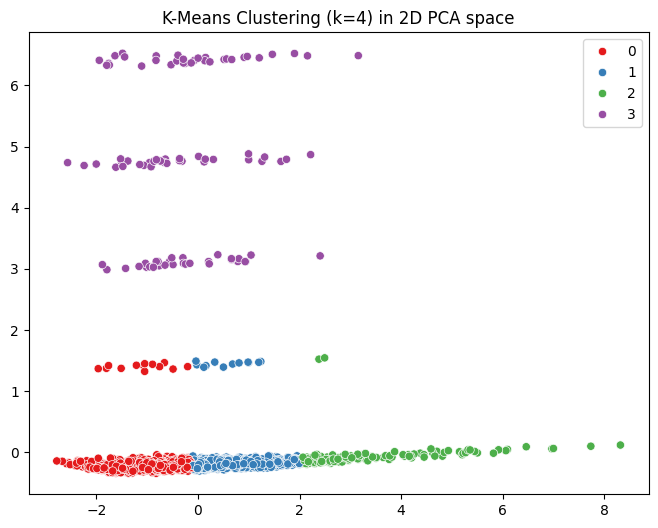

In [32]:
#K-Means
pca_final = PCA(n_components=best_n_components, random_state=42)
X_pca_final = pca_final.fit_transform(X)

kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_final.fit(X_pca_final)
final_labels = kmeans_final.labels_

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_final[:,0], y=X_pca_final[:,1], hue=final_labels, palette='Set1')
plt.title(f"K-Means Clustering (k={best_k}) in 2D PCA space")
plt.show()

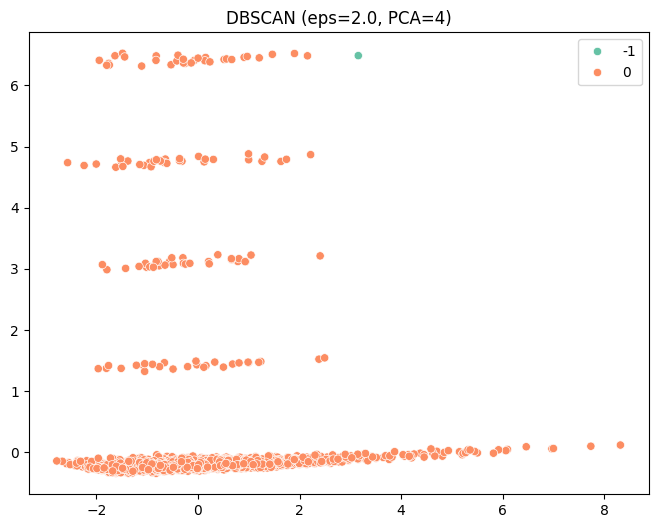

In [33]:
#DBScan
pca_final_db = PCA(n_components=best_ncomp_db, random_state=42)
X_pca_final_db = pca_final_db.fit_transform(X)
dbscan_final = DBSCAN(eps=best_eps_db_pca, min_samples=5)
labels_db = dbscan_final.fit_predict(X_pca_final_db)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_final_db[:,0], y=X_pca_final_db[:,1],
                hue=labels_db, palette='Set2')
plt.title(f"DBSCAN (eps={best_eps_db_pca}, PCA={best_ncomp_db})")
plt.show()


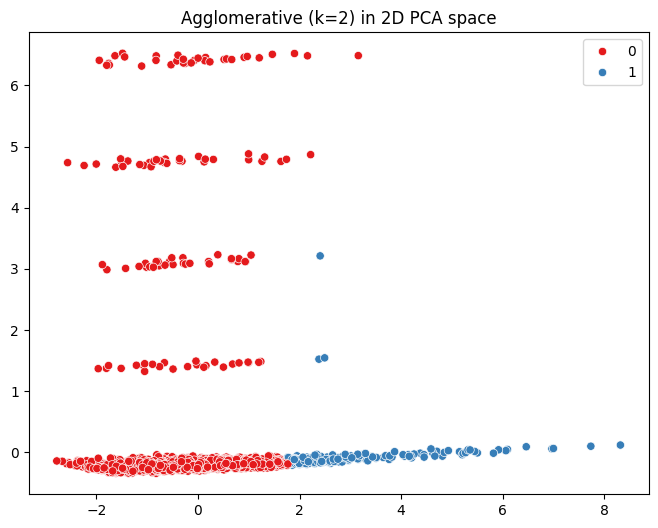

In [34]:
#Agglomerative
pca_final_agg = PCA(n_components=2, random_state=42)
X_pca_final_agg = pca_final_agg.fit_transform(X)

agg_final = AgglomerativeClustering(n_clusters=2, linkage='complete')
labels_agg = agg_final.fit_predict(X_pca_final_agg)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_final_agg[:,0], y=X_pca_final_agg[:,1],
                hue=labels_agg, palette='Set1')
plt.title("Agglomerative (k=2) in 2D PCA space")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Karena hasil silhouette score tertinggi yaitu pada model agglomerative maka output dari model tersebutlah yang akan di analisis dan di interpretasi hasil clusternya dan kemudian akan diexport hasil clusteringnya untuk digunakan di proyek klasifikasi

### Interpretasi Target dan Inverse Data

In [35]:
df_scaled['Cluster'] = labels_agg

In [36]:
df_inversed = df_scaled.copy()
df_inversed[num_cols] = scaler.inverse_transform(df_scaled[num_cols])

for col in cat_cols:
    df_inversed[col] = encoders[col].inverse_transform(df_scaled[col].astype(int))

display(df_inversed.head())

,TransactionAmount_log,TransactionType,Channel,LoginAttempts,AccountBalance,AmountBalanceRatio,Cluster
0,2.714032,Debit,ATM,1.0,5112.21,0.000531,0
1,5.932882,Debit,ATM,1.0,13758.91,0.000431,0
2,4.846468,Debit,Online,1.0,1122.35,0.004318,0
3,5.223055,Debit,Online,1.0,8569.06,0.000610,0
4,2.670694,Credit,Online,1.0,7429.40,0.000359,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (distribusi nilai dalam cluster).
2. Interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [37]:
grouped = df_inversed.groupby('Cluster')
agg_num = grouped[num_cols].agg(['mean','min','max'])

agg_type = df_inversed.groupby('Cluster')['TransactionType'].agg(lambda x: x.value_counts().index[0])
agg_chn = df_inversed.groupby('Cluster')['Channel'].agg(lambda x: x.value_counts().index[0])

print("\n=== Agregasi Numerik (mean, min, max) per Cluster ===")
display(agg_num)

print("\n=== Modus TransactionType per Cluster ===")
display(agg_type)

print("\n=== Modus Channel per Cluster ===")
display(agg_chn)


=== Agregasi Numerik (mean, min, max) per Cluster ===


TransactionAmount_log                     AccountBalance          \
                         mean       min       max           mean     min   
Cluster                                                                    
0                    5.101083  0.231112  7.560138    5449.189238  213.00   
1                    5.765072  3.271848  7.202847     319.711707  101.25   

                  LoginAttempts           AmountBalanceRatio            \
              max          mean  min  max               mean       min   
Cluster                                                                  
0        14977.99      1.131601  1.0  5.0           0.002022  0.000039   
1          756.74      1.024390  1.0  3.0           0.022028  0.009415   

                   
              max  
Cluster            
0        0.021845  
1        0.065504


=== Modus TransactionType per Cluster ===


,TransactionType
Cluster,
0,Debit
1,Debit



=== Modus Channel per Cluster ===


,Channel
Cluster,
0,Branch
1,Online


# Interpretasi
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster (0–5) yang dihasilkan dari model KMeans.

##Cluster 0:
- **TransactionAmount_log:** Rata-rata: 5.101 (Min: 231.112, Max: 7.560)

- **AccountBalance:** Rata-rata: 5.449 (Min: 213.00, Max: 14,977.99)

- **LoginAttempts:** Rata-rata: 1.131 (Min: 1, Max: 5)

- **AmountBalanceRatio:** Rata-rata: 2.022 (Min: 0.039, Max: 21.845)

- **TransactionType (Modus):** Debit

- **Channel (Modus):** Branch

- **Analisis:**
  - Transaksi di cluster ini memiliki jumlah transaksi yang cukup variatif dengan rentang yang luas.
  - Saldo rata-rata dalam cluster ini lebih tinggi dibandingkan cluster lainnya, menunjukkan pelanggan dengan akun yang memiliki dana lebih besar.
  - Pelanggan dalam cluster ini memiliki jumlah upaya login yang relatif stabil, dengan beberapa pelanggan yang melakukan hingga 5 kali percobaan login.
  - Perbandingan jumlah transaksi dengan saldo menunjukkan bahwa pelanggan dalam cluster ini lebih cenderung memiliki transaksi yang proporsional dengan saldo akun mereka.
  - Hampir semua transaksi dalam cluster ini adalah transaksi debit, menandakan bahwa pelanggan lebih sering melakukan pembayaran atau pengeluaran daripada menerima dana.
  - Mayoritas transaksi di cluster ini dilakukan melalui cabang bank, menunjukkan preferensi pelanggan untuk transaksi tatap muka atau melalui teller bank.


##Cluster 1:
- **TransactionAmount_log:** Rata-rata: 5.765 (Min: 3.271, Max: 7.202)

- **AccountBalance:** Rata-rata: 319.707 (Min: 101.25, Max: 756.74)

- **LoginAttempts:** Rata-rata: 1.024 (Min: 1, Max: 3)

- **AmountBalanceRatio:** Rata-rata: 22.028 (Min: 9.415, Max: 65.504)

- **TransactionType (Modus):** Debit

- **Channel (Modus):** Online

- **Analisis:**
  - Cluster ini memiliki jumlah transaksi rata-rata yang sedikit lebih tinggi dibandingkan cluster 0, meskipun distribusi transaksi lebih sempit dibandingkan dengan cluster lainnya.
  - Saldo rata-rata dalam cluster ini jauh lebih kecil dibandingkan cluster 0, menunjukkan pelanggan dengan dana yang lebih terbatas di akun mereka.
  - Jumlah percobaan login dalam cluster ini lebih kecil dibandingkan cluster 0, menunjukkan pelanggan yang lebih jarang mencoba login berulang kali.
  - Perbandingan jumlah transaksi dengan saldo sangat tinggi dalam cluster ini. Hal ini menunjukkan bahwa pelanggan dalam cluster ini cenderung melakukan transaksi dengan jumlah yang sangat besar dibandingkan saldo mereka, sehingga lebih rentan terhadap risiko finansial atau lebih aktif menggunakan dana di akun mereka.
  - Sama seperti cluster 0, pelanggan dalam cluster ini juga didominasi oleh transaksi debit.
  - Mayoritas transaksi di cluster ini dilakukan secara online, menunjukkan preferensi pelanggan untuk transaksi digital dibandingkan transaksi melalui cabang bank.


# Kesimpulan dan Insight
## Perbedaan utama antara Cluster 0 dan Cluster 1:

- Cluster 0 memiliki saldo yang lebih besar, lebih banyak melakukan transaksi di cabang bank, dan memiliki jumlah login attempts yang lebih tinggi.
- Cluster 1 memiliki saldo yang lebih kecil, tetapi jumlah transaksi terhadap saldo jauh lebih tinggi dan mereka lebih cenderung bertransaksi secara online.

# Peluang dan Strategi Bisnis:

## Cluster 0:

- Pelanggan ini cenderung menggunakan cabang bank dan memiliki saldo yang lebih tinggi.
- Bank dapat menawarkan produk investasi, tabungan premium, atau layanan prioritas untuk meningkatkan loyalitas pelanggan ini.
- Edukasi tentang layanan digital juga dapat ditingkatkan untuk meningkatkan penggunaan layanan online.

## Cluster 1:

- Pelanggan lebih aktif bertransaksi secara online dengan saldo yang relatif kecil.
- Bank dapat menawarkan kredit mikro atau fasilitas overdraft untuk mendukung kebiasaan transaksi mereka yang tinggi dibandingkan saldo akun mereka.
- Kampanye promosi untuk penggunaan kartu kredit atau fitur cash-back dapat meningkatkan engagement pelanggan ini.

## Potensi Risiko dan Deteksi Anomali:

- Cluster 1 memiliki AmountBalanceRatio yang sangat tinggi, artinya ada kemungkinan pelanggan ini sering melakukan transaksi dengan jumlah yang sangat besar dibandingkan saldo yang mereka miliki.
- Ini bisa menjadi indikator pelanggan yang lebih rentan terhadap risiko kredit atau potensi aktivitas mencurigakan yang perlu dipantau lebih lanjut oleh bank.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [38]:
df_inversed.to_csv("ClusteringResult.csv", index=False)